         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


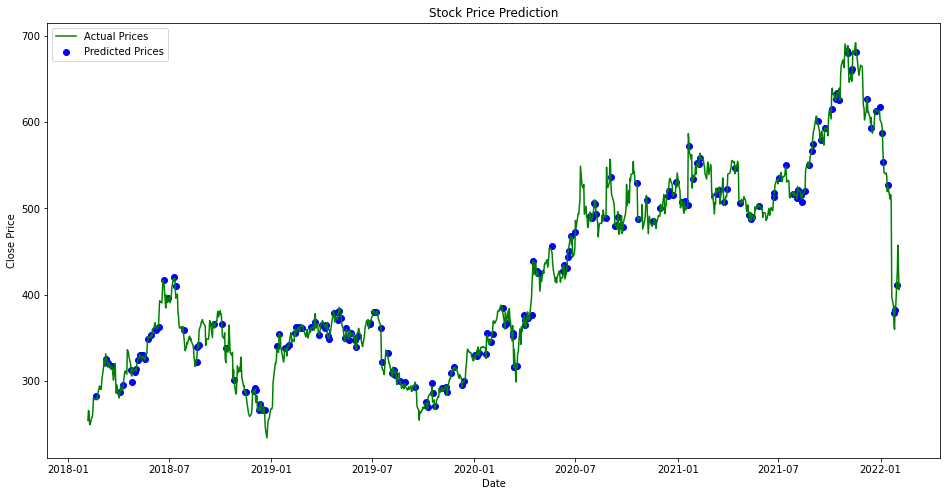

In [2]:
# Import necessary libraries
import pandas as pd;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.metrics import mean_absolute_error;
import matplotlib.pyplot as plt;

# Load the dataset (replace 'your_dataset.csv' with your actual CSV file)
dataset_path = 'C:\\Users\\Lenovo\\Downloads\\1729258-1613615-Stock_Price_data_set_(1).csv';
df = pd.read_csv(dataset_path);

# Display the first few rows of the dataset
print(df.head());

# Feature engineering: Extracting datetime features
df['Date'] = pd.to_datetime(df['Date']);
df['Year'] = df['Date'].dt.year;
df['Month'] = df['Date'].dt.month;
df['Day'] = df['Date'].dt.day;

# Define features and target variable
features = ['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume'];
# Add relevant features
X = df[features];
y = df['Close'];

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=42);

# Train the model
model.fit(X_train, y_train);

# Make predictions on the test set
predictions = model.predict(X_test);

# Evaluate the model
# mae = mean_absolute_error(y_test, predictions);
# print(f'Mean Absolute Error: {mae}');

# Visualize the predicted vs actual prices
plt.figure(figsize=(16, 8));

# Plotting the actual prices
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='green');

# Scatter plot for predicted prices
plt.scatter(df['Date'].iloc[X_test.index], predictions, label='Predicted Prices', color='blue', marker='o');

plt.xlabel('Date');
plt.ylabel('Close Price');
plt.title('Stock Price Prediction');
plt.legend();
plt.show();
